In [1]:
import pandas as pd
import numpy as np
import scipy.linalg as la
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA,TruncatedSVD

In [2]:
data = pd.read_csv("sensordata1hz.csv")
data

,Time & Date,T/D Activity,Job Time,Trt Time,Stg Time,Stg Pump Time,Stg Pump Left,Stg Pmp Tim Ann,Stg Pmp Lft Ann,% Job Complete,...,BHA ConTen,CT-JP ConTen,Max OD Growth,Depth of Max SF,Drag In COF,Drag Out COF,Drag Avg COF,Treating Pr LOR,Ann Pr @WH LOR,cpatToolfaceTar
0,5/4/2018 9:08,None,0.00000,0.000000,0.00000,0,0,0,0,0,...,0,0,0.000000,0,0,0,0,0.000000,-237.6,0
1,5/4/2018 9:08,None,12.20018,12.200184,12.20018,0,0,0,0,0,...,0,0,0.000046,0,0,0,0,0.000000,-237.6,0
2,5/4/2018 9:08,None,15.50704,15.507041,15.50704,0,0,0,0,0,...,0,0,0.000046,0,0,0,0,-4.797165,-237.6,0
3,5/4/2018 9:08,None,16.50711,16.507106,16.50711,0,0,0,0,0,...,0,0,0.000046,0,0,0,0,-5.668681,-237.6,0
4,5/4/2018 9:08,None,17.50775,17.507745,17.50775,0,0,0,0,0,...,0,0,0.000046,0,0,0,0,-6.362158,-237.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38286,5/4/2018 19:46,None,38299.53000,38299.531400,38299.53000,0,0,0,0,0,...,0,0,0.000045,0,0,0,0,-237.600000,-237.6,0
38287,5/4/2018 19:46,None,38300.53000,38300.531280,38300.53000,0,0,0,0,0,...,0,0,0.000045,0,0,0,0,-237.600000,-237.6,0
38288,5/4/2018 19:46,None,38301.53000,38301.531430,38301.53000,0,0,0,0,0,...,0,0,0.000045,0,0,0,0,-237.600000,-237.6,0
38289,5/4/2018 19:46,None,38302.53000,38302.531320,38302.53000,0,0,0,0,0,...,0,0,0.000045,0,0,0,0,-237.600000,-237.6,0


In [3]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data

,Job Time,Trt Time,Stg Time,Stg Pump Time,Stg Pump Left,Stg Pmp Tim Ann,Stg Pmp Lft Ann,% Job Complete,% Trt Complete,% Stg Complete,...,BHA ConTen,CT-JP ConTen,Max OD Growth,Depth of Max SF,Drag In COF,Drag Out COF,Drag Avg COF,Treating Pr LOR,Ann Pr @WH LOR,cpatToolfaceTar
0,0.00000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0.000000,0,0,0,0,0.000000,-237.6,0
1,12.20018,12.200184,12.20018,0,0,0,0,0,0,0,...,0,0,0.000046,0,0,0,0,0.000000,-237.6,0
2,15.50704,15.507041,15.50704,0,0,0,0,0,0,0,...,0,0,0.000046,0,0,0,0,-4.797165,-237.6,0
3,16.50711,16.507106,16.50711,0,0,0,0,0,0,0,...,0,0,0.000046,0,0,0,0,-5.668681,-237.6,0
4,17.50775,17.507745,17.50775,0,0,0,0,0,0,0,...,0,0,0.000046,0,0,0,0,-6.362158,-237.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38286,38299.53000,38299.531400,38299.53000,0,0,0,0,0,0,0,...,0,0,0.000045,0,0,0,0,-237.600000,-237.6,0
38287,38300.53000,38300.531280,38300.53000,0,0,0,0,0,0,0,...,0,0,0.000045,0,0,0,0,-237.600000,-237.6,0
38288,38301.53000,38301.531430,38301.53000,0,0,0,0,0,0,0,...,0,0,0.000045,0,0,0,0,-237.600000,-237.6,0
38289,38302.53000,38302.531320,38302.53000,0,0,0,0,0,0,0,...,0,0,0.000045,0,0,0,0,-237.600000,-237.6,0


In [4]:
non_numeric_columns = data.select_dtypes(exclude=[np.number])
non_numeric_columns

,Time & Date,T/D Activity,Plan 1 Stg Mode,Time BH Inj Tbg,Time BH Inj Ann
0,5/4/2018 9:08,None,Unknown,1/1/1970 0:00,1/1/1970 0:00
1,5/4/2018 9:08,None,Unknown,1/1/1970 0:00,1/1/1970 0:00
2,5/4/2018 9:08,None,Unknown,1/1/1970 0:00,1/1/1970 0:00
3,5/4/2018 9:08,None,Unknown,1/1/1970 0:00,1/1/1970 0:00
4,5/4/2018 9:08,None,Unknown,1/1/1970 0:00,1/1/1970 0:00
...,...,...,...,...,...
38286,5/4/2018 19:46,None,Unknown,1/1/1970 0:00,1/1/1970 0:00
38287,5/4/2018 19:46,None,Unknown,1/1/1970 0:00,1/1/1970 0:00
38288,5/4/2018 19:46,None,Unknown,1/1/1970 0:00,1/1/1970 0:00
38289,5/4/2018 19:46,None,Unknown,1/1/1970 0:00,1/1/1970 0:00


In [5]:
dataset = numeric_data.to_numpy()
dataset

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -2.37600000e+02,  0.00000000e+00],
       [ 1.22001800e+01,  1.22001836e+01,  1.22001800e+01, ...,
         0.00000000e+00, -2.37600000e+02,  0.00000000e+00],
       [ 1.55070400e+01,  1.55070410e+01,  1.55070400e+01, ...,
        -4.79716499e+00, -2.37600000e+02,  0.00000000e+00],
       ...,
       [ 3.83015300e+04,  3.83015314e+04,  3.83015300e+04, ...,
        -2.37600000e+02, -2.37600000e+02,  0.00000000e+00],
       [ 3.83025300e+04,  3.83025313e+04,  3.83025300e+04, ...,
        -2.37600000e+02, -2.37600000e+02,  0.00000000e+00],
       [ 3.83035300e+04,  3.83035311e+04,  3.83035300e+04, ...,
        -2.37600000e+02, -2.37600000e+02,  0.00000000e+00]])

In [6]:
# Perform SVD on the data matrix
U, S, V = np.linalg.svd(dataset, full_matrices=False)

In [7]:
U.shape

(38291, 423)

In [8]:
S.shape

(423,)

In [9]:
V.shape

(423, 423)

In [14]:
print(U)

[[-1.25332783e-03  1.75968332e-03 -9.92904991e-03 ...  6.89211298e-16
   5.26495051e-17  2.40449483e-11]
 [-4.76663877e-03  5.40715122e-03  3.13169377e-03 ...  5.21281326e-04
  -7.98595719e-05 -1.03094276e-03]
 [-4.76684994e-03  5.40438102e-03  3.13289617e-03 ...  1.65744053e-03
   4.40037638e-04  3.76235568e-01]
 ...
 [-4.79056964e-03  5.52298851e-03  4.22883784e-03 ...  2.73350002e-03
  -2.73904667e-05 -9.61735610e-04]
 [-4.79063570e-03  5.52296731e-03  4.23149408e-03 ...  1.57058907e-03
   4.23761100e-05  6.65531373e-04]
 [-4.79072057e-03  5.52294010e-03  4.23490841e-03 ...  1.46610213e-03
  -1.91459302e-05 -2.01842286e-03]]


In [15]:
print(S)

[4.40341025e+08 9.94161612e+07 2.09507069e+07 1.14853441e+07
 3.30249589e+06 9.19198064e+05 5.73897013e+05 1.80907012e+05
 1.25428496e+05 8.16918664e+04 7.74243481e+04 3.98137622e+04
 3.38291315e+04 1.63745642e+03 8.15626485e+01 8.84871866e+00
 5.64319697e+00 2.71131032e+00 1.99408556e+00 1.74164492e+00
 1.34540668e+00 8.37855177e-01 4.08774174e-01 8.13395136e-02
 3.43409275e-02 2.07738708e-02 7.36587708e-03 6.90372669e-05
 3.57546417e-06 7.18694121e-08 5.52764487e-08 3.85348098e-08
 3.85348098e-08 3.85348098e-08 3.85348098e-08 3.85348098e-08
 3.85348098e-08 3.85348098e-08 3.85348098e-08 3.85348098e-08
 3.85348098e-08 3.85348098e-08 3.85348098e-08 3.85348098e-08
 3.85348098e-08 3.85348098e-08 3.85348098e-08 3.85348098e-08
 3.85348098e-08 3.85348098e-08 3.85348098e-08 3.85348098e-08
 3.85348098e-08 3.85348098e-08 3.85348098e-08 3.85348098e-08
 3.85348098e-08 3.85348098e-08 3.85348098e-08 3.85348098e-08
 3.85348098e-08 3.85348098e-08 3.85348098e-08 3.85348098e-08
 3.85348098e-08 3.853480

In [16]:
print(V)

[[-8.60608421e-003 -8.60608418e-003 -8.60608421e-003 ...  3.92430771e-007
   1.05268085e-004  0.00000000e+000]
 [-4.26807188e-003 -4.26807189e-003 -4.26807188e-003 ... -8.41251999e-005
  -3.51066631e-005  0.00000000e+000]
 [-1.91216803e-002 -1.91216802e-002 -1.91216803e-002 ...  4.87875682e-005
   3.98875288e-005  0.00000000e+000]
 ...
 [ 0.00000000e+000 -8.62435908e-164 -7.96787002e-164 ...  3.12229628e-165
   1.66279388e-160  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...  0.00000000e+000
   0.00000000e+000  1.00000000e+000]
 [ 0.00000000e+000 -1.96433410e-008  1.96433666e-008 ...  4.38112056e-015
   1.41829379e-004  0.00000000e+000]]


In [47]:
def error_k(k, U, S, V, data_matrix):
    truncated_U = U[:, :k]
    truncated_S = np.diag(S[:k])
    truncated_V = V[:k, :]

    approximated_matrix = np.dot(np.dot(truncated_U, truncated_S), truncated_V)
        
    # Calculate Frobenius error
    error = np.linalg.norm(data_matrix - approximated_matrix, 'fro')

    return error

In [60]:
k_values = []
frobenius_errors = []
frobenius_errors_percentage = []

In [61]:
# Calculate Frobenius error percentage for a range of k values
for k in range(1, 30, 1):
    current_error = error_k(k, U, S, V, dataset)
    error_percentage = (current_error / np.linalg.norm(dataset, 'fro')) * 100
    k_values.append(k)
    frobenius_errors.append(current_error)
    frobenius_errors_percentage.append(error_percentage)
    print(current_error)
    print(f"Frobenius Error Percentage for k = {k}: {error_percentage}")

102306221.61590478
Frobenius Error Percentage for k = 1: 22.63064294882566
24145183.182718616
Frobenius Error Percentage for k = 2: 5.341034112212262
12002406.095035007
Frobenius Error Percentage for k = 3: 2.6549916766872275
3484913.4773482247
Frobenius Error Percentage for k = 4: 0.7708801221250208
1112718.6713624625
Frobenius Error Percentage for k = 5: 0.24613888145176874
627070.778147581
Frobenius Error Percentage for k = 6: 0.13871116203644454
252705.3209974733
Frobenius Error Percentage for k = 7: 0.05589966866563589
176444.4166502394
Frobenius Error Percentage for k = 8: 0.03903037890028604
124098.04410749678
Frobenius Error Percentage for k = 9: 0.027451102019857745
93417.14784536386
Frobenius Error Percentage for k = 10: 0.0206643358027937
52270.774231112606
Frobenius Error Percentage for k = 11: 0.011562554159453843
33868.83790693593
Frobenius Error Percentage for k = 12: 0.0074919546989150165
1639.5252938284516
Frobenius Error Percentage for k = 13: 0.00036267111563850345
8

In [74]:
# Find the minimum k ensuring the error is < 0.1 as soon as possible
for k in range(1,30,1):
    current_error = error_k(k, U, S, V, dataset)
    error_percentage = (current_error / np.linalg.norm(dataset, 'fro')) * 100
    
    print(f"Frobenius Error Percentage for k = {k}: {error_percentage:.2f}%")

    # Check if the error is less than 15%
    if error_percentage < 15:
        print(f"Minimum k ensuring error < 0.15: {k}")
        break

Frobenius Error Percentage for k = 1: 22.63%
Frobenius Error Percentage for k = 2: 5.34%
Minimum k ensuring error < 0.15: 2


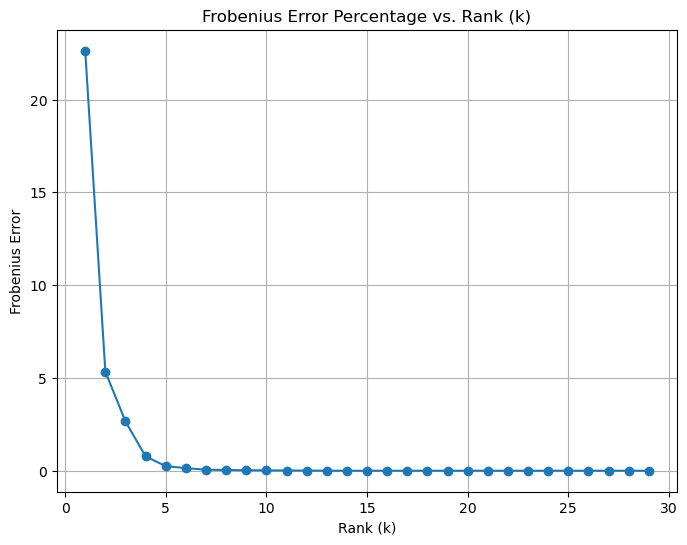

In [63]:
# Plot Frobenius error vs. k
plt.figure(figsize=(8, 6))
plt.plot(k_values, frobenius_errors_percentage, marker='o', linestyle='-')
plt.title('Frobenius Error Percentage vs. Rank (k)')
plt.xlabel('Rank (k)')
plt.ylabel('Frobenius Error')
plt.grid(True)
plt.show()

In [75]:
# Create a TruncatedSVD instance with the optimal k
svd = TruncatedSVD(n_components = k)

# Fit the SVD to your data and transform it to get the truncated matrix
truncated_matrix = svd.fit_transform(dataset)
truncated_matrix

array([[ 551891.66362728,  174940.96077587],
       [2098946.60286877,  537558.21788663],
       [2099039.58848571,  537282.81464749],
       ...,
       [2109484.34661452,  549074.31564646],
       [2109513.43446997,  549072.2079776 ],
       [2109550.80789787,  549069.50307456]])

In [76]:
truncated_matrix.shape

(38291, 2)

In [77]:
# Save the truncated matrix to a CSV file
np.savetxt("truncated_data.csv", truncated_matrix, delimiter=",")